In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [9]:
PATH = "datasets/quality/"
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

NameError: name 'PATH' is not defined

In [3]:
# étiquettes
class_names = ["1", "2", "3", "4"]

In [4]:
# normalisation

NameError: name 'train_images' is not defined

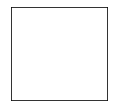

In [5]:
# vérification : affichage 25 images avec leur classe
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input # modele MobileNet V2 (rapide et correct)
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1) # [0, 255] => [-1, 1]

In [10]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

NameError: name 'IMG_SIZE' is not defined

In [11]:
# gel : a voir
base_model.trainable = False

NameError: name 'base_model' is not defined

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

In [ ]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = preprocess_input(x)
x = base_model(x, training=False) # mobile net v2
x = global_average_layer(x) # moyenne des features
outputs = prediction_layer(x) # prediction
model = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy(from_logits=True),
              metrics=['accuracy'])